## PCA dimension reduction

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [3]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=2)
pca.fit_transform(X)

array([[1010.49384586, -289.97205546],
       [1033.56095728, -351.17933541],
       [ 615.4284374 , -244.24197676],
       ...,
       [-134.30291255,  759.47921592],
       [  13.21463502,  870.36796318],
       [ 341.04943823,  959.29497847]])

In [6]:
print(pca.explained_variance_ratio_)

[0.09746116 0.07155445]


### Choosing right number of dimensions

In [7]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [9]:
d

154

In [10]:
### plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [11]:
import pandas as pd

In [12]:
cumsum_ser = pd.Series(cumsum)

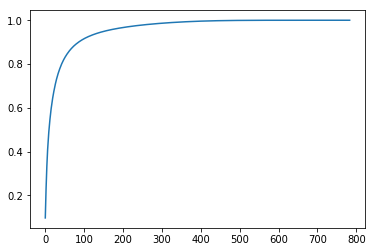

In [13]:
plt.plot(cumsum_ser.index, cumsum_ser, '-')

### Incremental learning

In [15]:

from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_mnist_Reduced = inc_pca.transform(X)

## memmap

In [17]:
filename = "my_mnist.data"
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

In [20]:
del X_mm

In [19]:
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, copy=True, n_components=154, whiten=False)

### random PCA

In [22]:
rnd_pca = PCA(n_components=154, svd_solver='randomized')
X_reduced = rnd_pca.fit_transform(X)

## kernel PCA

In [24]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.4)
X_reduced = rbf_pca.fit_transform(X)